In [31]:
##Goal is to take better decition based on Customer review
## Classify the reviews into certain categories

##Standard
import pandas as pd
import string
import numpy as np

## nlp
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('punkt_tab')
 ## visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

##from transformers
from transformers import pipeline



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
url ='/content/sample_data/customer_reviews.csv'

df= pd.read_csv(url)
df.head(5)

,review_id,product_id,review_text,rating
0,1,P101,Excellent battery life and superb camera quali...,5
1,2,P101,"The phone lasts two days on a single charge, g...",5
2,3,P101,Battery is good but the screen is average.,4
3,4,P101,Amazing camera but the design feels outdated.,4
4,5,P101,Very reliable battery performance.,5


In [13]:
stop_words =set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [35]:

def clean_text(text):
 text = text.lower() ## lower case
 text =text.translate(str.maketrans('','',string.punctuation)) ##removing string punctuation
 words = nltk.word_tokenize(text) ## tokenizations
 words = [word for word in words if word not in stop_words] ## stopwords

## stemmed = [stemmer.stem(Word) for word in words]
 lemmatized =[lemmatizer.lemmatize(word) for word in words]
 return ' '.join(lemmatized)




In [37]:
df['Clean_review']= df['review_text'].apply(clean_text)
df

,review_id,product_id,review_text,rating,Clean_review
0,1,P101,Excellent battery life and superb camera quali...,5,excellent battery life superb camera quality h...
1,2,P101,"The phone lasts two days on a single charge, g...",5,phone last two day single charge great outdoor...
2,3,P101,Battery is good but the screen is average.,4,battery good screen average
3,4,P101,Amazing camera but the design feels outdated.,4,amazing camera design feel outdated
4,5,P101,Very reliable battery performance.,5,reliable battery performance
5,6,P102,"Poor performance, lags frequently when opening...",2,poor performance lag frequently opening apps
6,7,P102,"Camera quality is below average, not recommended.",2,camera quality average recommended
7,8,P102,The phone heats up quickly during use.,1,phone heat quickly use
8,9,P102,Touch response is slow and frustrating.,2,touch response slow frustrating
9,10,P102,Good design but very slow.,2,good design slow


In [47]:
## Once data is cleaned
## word Cloud - Frequently occuring words

all_words = ' '.join(df['Clean_review'])
print(all_words)

wordcloud = WordCloud(background_color='white').generate(all_words)
print (wordcloud)


excellent battery life superb camera quality highly recommended traveler phone last two day single charge great outdoor use battery good screen average amazing camera design feel outdated reliable battery performance poor performance lag frequently opening apps camera quality average recommended phone heat quickly use touch response slow frustrating good design slow blazing fast performance smooth multitasking run heavy game without lag excellent speed responsive fast loading time performance topnotch price range incredible speed battery drain fast extremely lightweight portable great travel slim design battery life short comfortable carry around lightweight get scratched easily compact fit small bag affordable good value money budgetfriendly camera basic great basic use gaming cheap feel durable low cost work well call excellent sound quality deep bass loud clear audio perfect music lover sound crisp treble high impressive audio performance best sound system ive used phone rugged dura

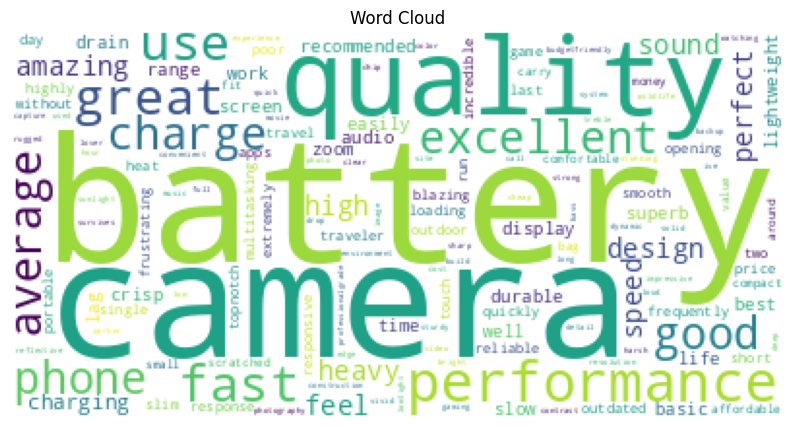

In [50]:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [74]:
## transformer based analysis
##Summarization


summerizer = pipeline('summarization')


def summarize_review(text):
  if len(text.split())>30:
    summary = summerizer(text,max_length = 40, min_length = 10)
    return summary[0]['summary_text']
  else:
    return text

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [75]:
df['Summary'] = df['review_text'].apply(summarize_review)
df

,review_id,product_id,review_text,rating,Clean_review,Summary,Sentimental_value
0,1,P101,Excellent battery life and superb camera quali...,5,excellent battery life superb camera quality h...,Excellent battery life and superb camera quali...,POSITIVE
1,2,P101,"The phone lasts two days on a single charge, g...",5,phone last two day single charge great outdoor...,"The phone lasts two days on a single charge, g...",NEGATIVE
2,3,P101,Battery is good but the screen is average.,4,battery good screen average,Battery is good but the screen is average.,POSITIVE
3,4,P101,Amazing camera but the design feels outdated.,4,amazing camera design feel outdated,Amazing camera but the design feels outdated.,NEGATIVE
4,5,P101,Very reliable battery performance.,5,reliable battery performance,Very reliable battery performance.,Very reliable battery performance.
5,6,P102,"Poor performance, lags frequently when opening...",2,poor performance lag frequently opening apps,"Poor performance, lags frequently when opening...",NEGATIVE
6,7,P102,"Camera quality is below average, not recommended.",2,camera quality average recommended,"Camera quality is below average, not recommended.",NEGATIVE
7,8,P102,The phone heats up quickly during use.,1,phone heat quickly use,The phone heats up quickly during use.,POSITIVE
8,9,P102,Touch response is slow and frustrating.,2,touch response slow frustrating,Touch response is slow and frustrating.,NEGATIVE
9,10,P102,Good design but very slow.,2,good design slow,Good design but very slow.,Good design but very slow.


In [101]:
## sentiment analysis

sentiment =pipeline('sentiment-analysis')

df['Sentimental_value']= df['Clean_review'].apply(lambda x: sentiment (x)[0])
df['Sentiment_label'] = df['Sentimental_value'].apply(lambda x : x['label'])
df['Sentiment_scores'] = df['Sentimental_value'].apply(lambda x : x['score'])
###df['Sentiment_label'] = df['Sentiment_result'].apply(lambda x: x['score'])
df.drop('Sentiment_result',axis=1,inplace=True)
df

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


,review_id,product_id,review_text,rating,Clean_review,Summary,Sentiment_label,Sentiment_scores,Sentimental_value
0,1,P101,Excellent battery life and superb camera quali...,5,excellent battery life superb camera quality h...,Excellent battery life and superb camera quali...,POSITIVE,0.999805,"{'label': 'POSITIVE', 'score': 0.9998045563697..."
1,2,P101,"The phone lasts two days on a single charge, g...",5,phone last two day single charge great outdoor...,"The phone lasts two days on a single charge, g...",POSITIVE,0.950745,"{'label': 'POSITIVE', 'score': 0.9507454633712..."
2,3,P101,Battery is good but the screen is average.,4,battery good screen average,Battery is good but the screen is average.,POSITIVE,0.999776,"{'label': 'POSITIVE', 'score': 0.9997755885124..."
3,4,P101,Amazing camera but the design feels outdated.,4,amazing camera design feel outdated,Amazing camera but the design feels outdated.,NEGATIVE,0.998256,"{'label': 'NEGATIVE', 'score': 0.9982555508613..."
4,5,P101,Very reliable battery performance.,5,reliable battery performance,Very reliable battery performance.,POSITIVE,0.999650,"{'label': 'POSITIVE', 'score': 0.9996503591537..."
5,6,P102,"Poor performance, lags frequently when opening...",2,poor performance lag frequently opening apps,"Poor performance, lags frequently when opening...",NEGATIVE,0.999741,"{'label': 'NEGATIVE', 'score': 0.9997407793998..."
6,7,P102,"Camera quality is below average, not recommended.",2,camera quality average recommended,"Camera quality is below average, not recommended.",POSITIVE,0.998582,"{'label': 'POSITIVE', 'score': 0.9985824823379..."
7,8,P102,The phone heats up quickly during use.,1,phone heat quickly use,The phone heats up quickly during use.,NEGATIVE,0.968715,"{'label': 'NEGATIVE', 'score': 0.9687150120735..."
8,9,P102,Touch response is slow and frustrating.,2,touch response slow frustrating,Touch response is slow and frustrating.,NEGATIVE,0.997933,"{'label': 'NEGATIVE', 'score': 0.9979333877563..."
9,10,P102,Good design but very slow.,2,good design slow,Good design but very slow.,NEGATIVE,0.954436,"{'label': 'NEGATIVE', 'score': 0.9544359445571..."
